In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
plt.style.use('ggplot')
import pandas as pd
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
ML_output = pd.read_csv('MultiLogistic_Holdout_Preds.csv')
NB_output = pd.read_csv('NB_output.csv')

In [ ]:
NB_output.sample(5)

In [ ]:
NB_output.columns

In [3]:
NB_output.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
NB_output.rename(columns = {'Labels':'mapped_brand', 'Predictions':'mapped_brand_response'}, inplace=True)

In [ ]:
NB_output['mapped_brand'].value_counts().head(5)

In [ ]:
NB_output.sample(5)

In [5]:
NB_output['true_target'] = np.where(NB_output['mapped_brand'].str.contains('target'),1,0)
NB_output['true_starbucks'] = np.where(NB_output['mapped_brand'].str.contains('starbucks'),1,0)
NB_output['true_mcdonalds'] = np.where(NB_output['mapped_brand'].str.contains('mcdonalds'),1,0)
NB_output['true_atm'] = np.where(NB_output['mapped_brand'].str.contains('atm'),1,0)

# NB_output['predict_target'] = np.where(NB_output['mapped_brand_response'].str.contains('target'),1,0)
# NB_output['predict_starbucks'] = np.where(NB_output['mapped_brand_response'].str.contains('starbucks'),1,0)
# NB_output['predict_mcdonalds'] = np.where(NB_output['mapped_brand_response'].str.contains('mcdonalds'),1,0)
# NB_output['predict_atm'] = np.where(NB_output['mapped_brand_response'].str.contains('atm'),1,0)

In [ ]:
true_NB = NB_output['true_atm']
predicted_NB = NB_output['predict_atm']
prob_NB = NB_output['Confidence']
#print('confusion_matrix:\n', confusion_matrix(true_NB,predicted_NB))

ROC_NB = roc_curve(true_NB, prob_NB)

plt.plot(ROC_NB[0],ROC_NB[1], c='g',label='Naiive Bayes')

true_ML = ML_output['true_atm']
predicted_ML = ML_output['predict_atm']
prob_ML = ML_output['probs']

ROC_ML = roc_curve(true_ML, prob_ML)

plt.plot(ROC_ML[0],ROC_ML[1], c='b',label='Multilogistic')

plt.title('ATM ROC Curve for Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print('AUC %.1f' %(auc(ROC_NB[0], ROC_NB[1])))
print('AUC %.1f' %(auc(ROC_ML[0], ROC_ML[1])))
plt.legend(loc=4)

AUC 0.6
AUC 0.6


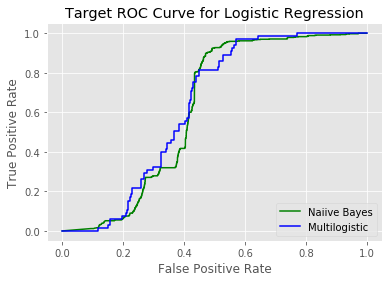

In [8]:
true_NB = NB_output['true_target']
#predicted_NB = NB_output['predict_target']
prob_NB = NB_output['Confidence']

ROC_NB = roc_curve(true_NB, prob_NB)

plt.plot(ROC_NB[0],ROC_NB[1], c='g',label='Naiive Bayes')


true_ML = ML_output['true_target']
#predicted_ML = ML_output['predict_target']
prob_ML = ML_output['probs']

ROC_ML = roc_curve(true_ML, prob_ML)

plt.plot(ROC_ML[0],ROC_ML[1], c='b',label='Multilogistic')

plt.title('Target ROC Curve for Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print('AUC %.1f' %(auc(ROC_NB[0], ROC_NB[1])))
print('AUC %.1f' %(auc(ROC_ML[0], ROC_ML[1])))
plt.legend(loc=4)

In [12]:
NB_output[(NB_output['mapped_brand'] == 'target') & (NB_output['mapped_brand_response'] != 'target')]

,Merchant_String,mapped_brand,mapped_brand_response,Confidence,CorrectPrediction,true_target,true_starbucks,true_mcdonalds,true_atm
5554,target t 608 w main s z531z,target,dollargeneral,0.902669,0,1,0,0,0
24251,9target center z5814z,target,mcdonalds,0.492406,0,1,0,0,0
41744,paypal targetcorpo z531z,target,paypal,0.960771,0,1,0,0,0


In [13]:
ML_output[(ML_output['mapped_brand'] == 'target') & (ML_output['mapped_brand_response'] != 'target')]

,Unnamed: 0,mapped_brand,mcc,merchant_string,network,mapped_brand_response,merchant_string1,probs,correct_flag,true_target,true_starbucks,true_mcdonalds,true_atm,predict_target,predict_starbucks,predict_mcdonalds,predict_atm


AUC 0.7
AUC 0.9


Text(0.5,0,'False Positive Rate')

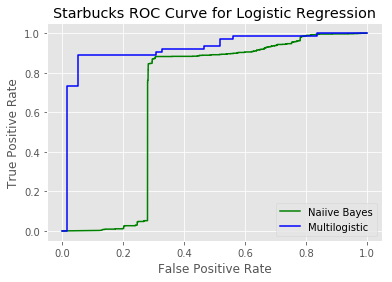

In [7]:
true_NB = NB_output['true_starbucks']
# predicted_NB = NB_output['predict_starbucks']
prob_NB = NB_output['Confidence']

ROC_NB = roc_curve(true_NB, prob_NB)

plt.plot(ROC_NB[0],ROC_NB[1], c='g',label='Naiive Bayes')
plt.title('Starbucks ROC Curve for Logistic Regression')


true_ML = ML_output['true_starbucks']
# predicted_ML = ML_output['predict_starbucks']
prob_ML = ML_output['probs']

ROC_ML = roc_curve(true_ML, prob_ML)

print('AUC %.1f' %(auc(ROC_NB[0], ROC_NB[1])))
print('AUC %.1f' %(auc(ROC_ML[0], ROC_ML[1])))

plt.plot(ROC_ML[0],ROC_ML[1], c='b',label='Multilogistic')
plt.legend(loc=4)

plt.title('Starbucks ROC Curve for Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

NB AUC 0.7
ML AUC 0.8


Text(0.5,0,'False Positive Rate')

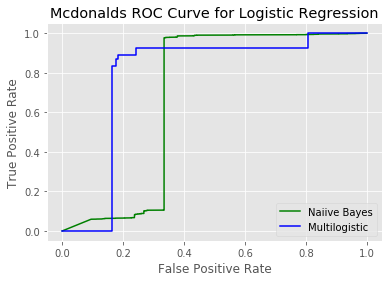

In [6]:
true_NB = NB_output['true_mcdonalds']
# predicted_NB = NB_output['predict_mcdonalds']
prob_NB = NB_output['Confidence']

ROC_NB = roc_curve(true_NB, prob_NB)

plt.plot(ROC_NB[0],ROC_NB[1], c='g',label='Naiive Bayes')

true_ML = ML_output['true_mcdonalds']
# predicted_ML = ML_output['predict_mcdonalds']
prob_ML = ML_output['probs']

ROC_ML = roc_curve(true_ML, prob_ML)

print('NB AUC %.1f' %(auc(ROC_NB[0], ROC_NB[1])))
print('ML AUC %.1f' %(auc(ROC_ML[0], ROC_ML[1])))

plt.plot(ROC_ML[0],ROC_ML[1], c='b',label='Multilogistic')
plt.legend(loc=4)

plt.title('Mcdonalds ROC Curve for Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
ML_output.sample(4)